<a href="https://colab.research.google.com/github/Fabian12Florin/Licenta---Estimarea-adancimii-din-imagini/blob/main/DepthEstimationPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Curățare și instalare versiuni compatibile
!pip uninstall -y torch torchvision torchaudio timm numpy
!pip install torch==2.0.1+cu117 torchvision==0.15.2+cu117 torchaudio==2.0.2+cu117 --index-url https://download.pytorch.org/whl/cu117
!pip install numpy==1.24.4 timm==0.9.2


Found existing installation: torch 2.6.0+cu124
Uninstalling torch-2.6.0+cu124:
  Successfully uninstalled torch-2.6.0+cu124
Found existing installation: torchvision 0.21.0+cu124
Uninstalling torchvision-0.21.0+cu124:
  Successfully uninstalled torchvision-0.21.0+cu124
Found existing installation: torchaudio 2.6.0+cu124
Uninstalling torchaudio-2.6.0+cu124:
  Successfully uninstalled torchaudio-2.6.0+cu124
Found existing installation: timm 1.0.15
Uninstalling timm-1.0.15:
  Successfully uninstalled timm-1.0.15
Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Looking in indexes: https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 683.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 MB 12.9 MB/s eta 0:00:00
  

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 93.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.2
    Uninstalling numpy-2.1.2:
      Successfully uninstalled numpy-2.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
pymc 5.23.0 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
blosc2 3.4.0 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5

In [ ]:
import os

# Navigate to content directory
os.chdir('/content')

# 🔄 REPLACE WITH YOUR ACTUAL REPOSITORY URL
REPO_URL = "https://github.com/Fabian12Florin/Licenta---Estimarea-adancimii-din-imagini.git"
REPO_NAME = "Licenta---Estimarea-adancimii-din-imagini"  # Adjust if your repo name is different

print(f"📥 Cloning repository: {REPO_URL}")
!git clone {REPO_URL}

# Change to repository directory
os.chdir(f'/content/{REPO_NAME}')
print(f"📁 Changed to directory: {os.getcwd()}")

# Verify repository contents
print("\n📋 Repository contents:")
!ls -la

# Check for essential files
essential_files = ['predict.py', 'requirements.txt', 'models/', 'options/']
for file in essential_files:
    if os.path.exists(file):
        print(f"✅ Found: {file}")
    else:
        print(f"❌ Missing: {file}")


📥 Cloning repository: https://github.com/Fabian12Florin/Licenta---Estimarea-adancimii-din-imagini.git
fatal: destination path 'Licenta---Estimarea-adancimii-din-imagini' already exists and is not an empty directory.
📁 Changed to directory: /content/Licenta---Estimarea-adancimii-din-imagini

📋 Repository contents:
total 156
drwxr-xr-x 9 root root  4096 Jun 22 23:59 .
drwxr-xr-x 1 root root  4096 Jun 22 23:59 ..
drwxr-xr-x 3 root root  4096 Jun 22 23:59 datasets
drwxr-xr-x 4 root root  4096 Jun 22 23:59 data_splits
-rw-r--r-- 1 root root  2905 Jun 22 23:59 environment.yml
-rw-r--r-- 1 root root 11237 Jun 22 23:59 evaluate.py
drwxr-xr-x 2 root root  4096 Jun 22 23:59 example_images
drwxr-xr-x 8 root root  4096 Jun 22 23:59 .git
-rw-r--r-- 1 root root   178 Jun 22 23:59 .gitignore
-rw-r--r-- 1 root root 11357 Jun 22 23:59 LICENSE
-rw-r--r-- 1 root root  8426 Jun 22 23:59 logger.py
-rw-r--r-- 1 root root 15312 Jun 22 23:59 metric.py
drwxr-xr-x 6 root root  4096 Jun 22 23:59 models
drwxr-xr-

In [ ]:
from google.colab import files
import os

print("📤 Upload your model file: best_model-refdepth.pth (137MB)")
uploaded = files.upload()

# Create model directory structure
model_dir = "train_log/2025-06-16_12h32m02s_TiO-Depth-MFM0-ACVDAV21/model"
os.makedirs(model_dir, exist_ok=True)

# Move uploaded file
for filename in uploaded.keys():
    if filename.endswith('.pth'):
        model_path = f"{model_dir}/{filename}"
        os.rename(filename, model_path)
        file_size = os.path.getsize(model_path) / (1024*1024)
        print(f"✅ Model placed at: {model_path} ({file_size:.1f} MB)")

print("✅ Model upload complete!")


📤 Upload your model file: best_model-refdepth.pth (137MB)


Saving best_model-refdepth.pth to best_model-refdepth (1).pth
✅ Model placed at: train_log/2025-06-16_12h32m02s_TiO-Depth-MFM0-ACVDAV21/model/best_model-refdepth (1).pth (137.2 MB)
✅ Model upload complete!


In [ ]:
# Instalează MMCV-FULL 1.7.1 pentru Torch 2.0.1 cu CUDA 11.7 (Colab)
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu117/torch2.0/index.html


Looking in links: https://download.openmmlab.com/mmcv/dist/cu117/torch2.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 MB 13.4 MB/s eta 0:00:00
  Using cached addict-2.4.0-py3-none-any.whl.metadata (1.0 kB)
  Using cached yapf-0.43.0-py3-none-any.whl.metadata (46 kB)
Using cached addict-2.4.0-py3-none-any.whl (3.8 kB)
Using cached yapf-0.43.0-py3-none-any.whl (256 kB)


In [ ]:
from mmcv.ops import DeformConv2d
print("✅ mmcv-full funcționează!")


/usr/local/lib/python3.11/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


✅ mmcv-full funcționează!


✅ Output directory: /content/depth_predictions
📷 Found 3 example images:
  - Timisoara1.png
  - Timisoara2.png
  - Timisoara3.png


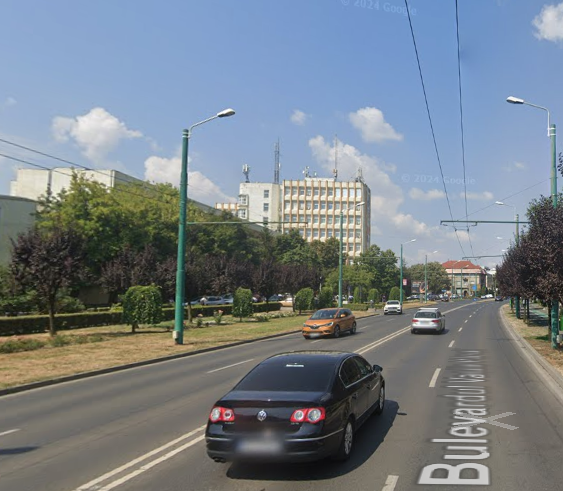

Preview: Timisoara1.png

✅ Ready to run prediction!
Images: example_images/ → Results: /content/depth_predictions


In [25]:
import os
from IPython.display import Image, display

# Create output directory
output_dir = "/content/depth_predictions"
os.makedirs(output_dir, exist_ok=True)
print(f"✅ Output directory: {output_dir}")

# Check example images
if os.path.exists("example_images"):
    images = [f for f in os.listdir("example_images") if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(f"📷 Found {len(images)} example images:")
    for img in images:
        print(f"  - {img}")

    # Show first image
    if images:
        img_path = f"example_images/{images[0]}"
        display(Image(img_path, width=400))
        print(f"Preview: {images[0]}")
else:
    print("❌ No example_images directory found")

print(f"\n✅ Ready to run prediction!")
print(f"Images: example_images/ → Results: {output_dir}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [31]:
import time

# Configuration
image_path = "example_images"
config_path = "options/TiO-Depth/eval/tio_depth-swint-m_384_kitti.yaml"
model_path = "/content/Licenta---Estimarea-adancimii-din-imagini/train_log/2025-06-16_12h32m02s_TiO-Depth-MFM0-ACVDAV21/model/best_model-refdepth.pth"
output_dir = "/content/depth_predictions"

print("🚀 Running TiO-Depth prediction...")
print(f"Images: {image_path}")
print(f"Config: {config_path}")
print(f"Model: {model_path}")
print(f"Output: {output_dir}")

# Verify files exist
for name, path in [("Config", config_path), ("Model", model_path), ("Images", image_path)]:
    if os.path.exists(path):
        print(f"✅ {name}: Found")
    else:
        print(f"❌ {name}: Missing - {path}")

print("\n" + "="*60)
start_time = time.time()

# Run prediction
cmd = f"python predict.py --image_path {image_path} --exp_opts {config_path} --model_path {model_path} --out_dir {output_dir}"
print(f"Executing: {cmd}")

result = os.system(cmd)
duration = time.time() - start_time

if result == 0:
    print(f"\n🎉 SUCCESS! Completed in {duration:.1f} seconds")
else:
    print(f"\n⚠️ Completed with warnings in {duration:.1f} seconds")

# Check output
if os.path.exists(output_dir):
    files = os.listdir(output_dir)
    print(f"📁 Generated {len(files)} files:")
    for f in sorted(files):
        size = os.path.getsize(f"{output_dir}/{f}") / 1024
        print(f"  - {f} ({size:.1f} KB)")

    if len(files) > 0:
        print("\n✅ Depth estimation completed successfully!")
    else:
        print("\n❌ No output files generated")
else:
    print("❌ Output directory not created")


🚀 Running TiO-Depth prediction...
Images: example_images
Config: options/TiO-Depth/eval/tio_depth-swint-m_384_kitti.yaml
Model: /content/Licenta---Estimarea-adancimii-din-imagini/train_log/2025-06-16_12h32m02s_TiO-Depth-MFM0-ACVDAV21/model/best_model-refdepth.pth
Output: /content/depth_predictions
✅ Config: Found
✅ Model: Found
✅ Images: Found

Executing: python predict.py --image_path example_images --exp_opts options/TiO-Depth/eval/tio_depth-swint-m_384_kitti.yaml --model_path /content/Licenta---Estimarea-adancimii-din-imagini/train_log/2025-06-16_12h32m02s_TiO-Depth-MFM0-ACVDAV21/model/best_model-refdepth.pth --out_dir /content/depth_predictions

🎉 SUCCESS! Completed in 11.1 seconds
📁 Generated 20 files:
  - .ipynb_checkpoints (4.0 KB)
  - 0000000000_visual.png (665.5 KB)
  - 0000000001_pred.npy (1920.1 KB)
  - 0000000001_visual.png (657.7 KB)
  - 0000000027_pred.npy (1920.1 KB)
  - 0000000027_visual.png (772.6 KB)
  - 0000000028_pred.npy (1920.1 KB)
  - 0000000028_visual.png (772.6

📊 Visualizing depth estimation results...
🖼️ Found 10 PNG files and 9 NPY files


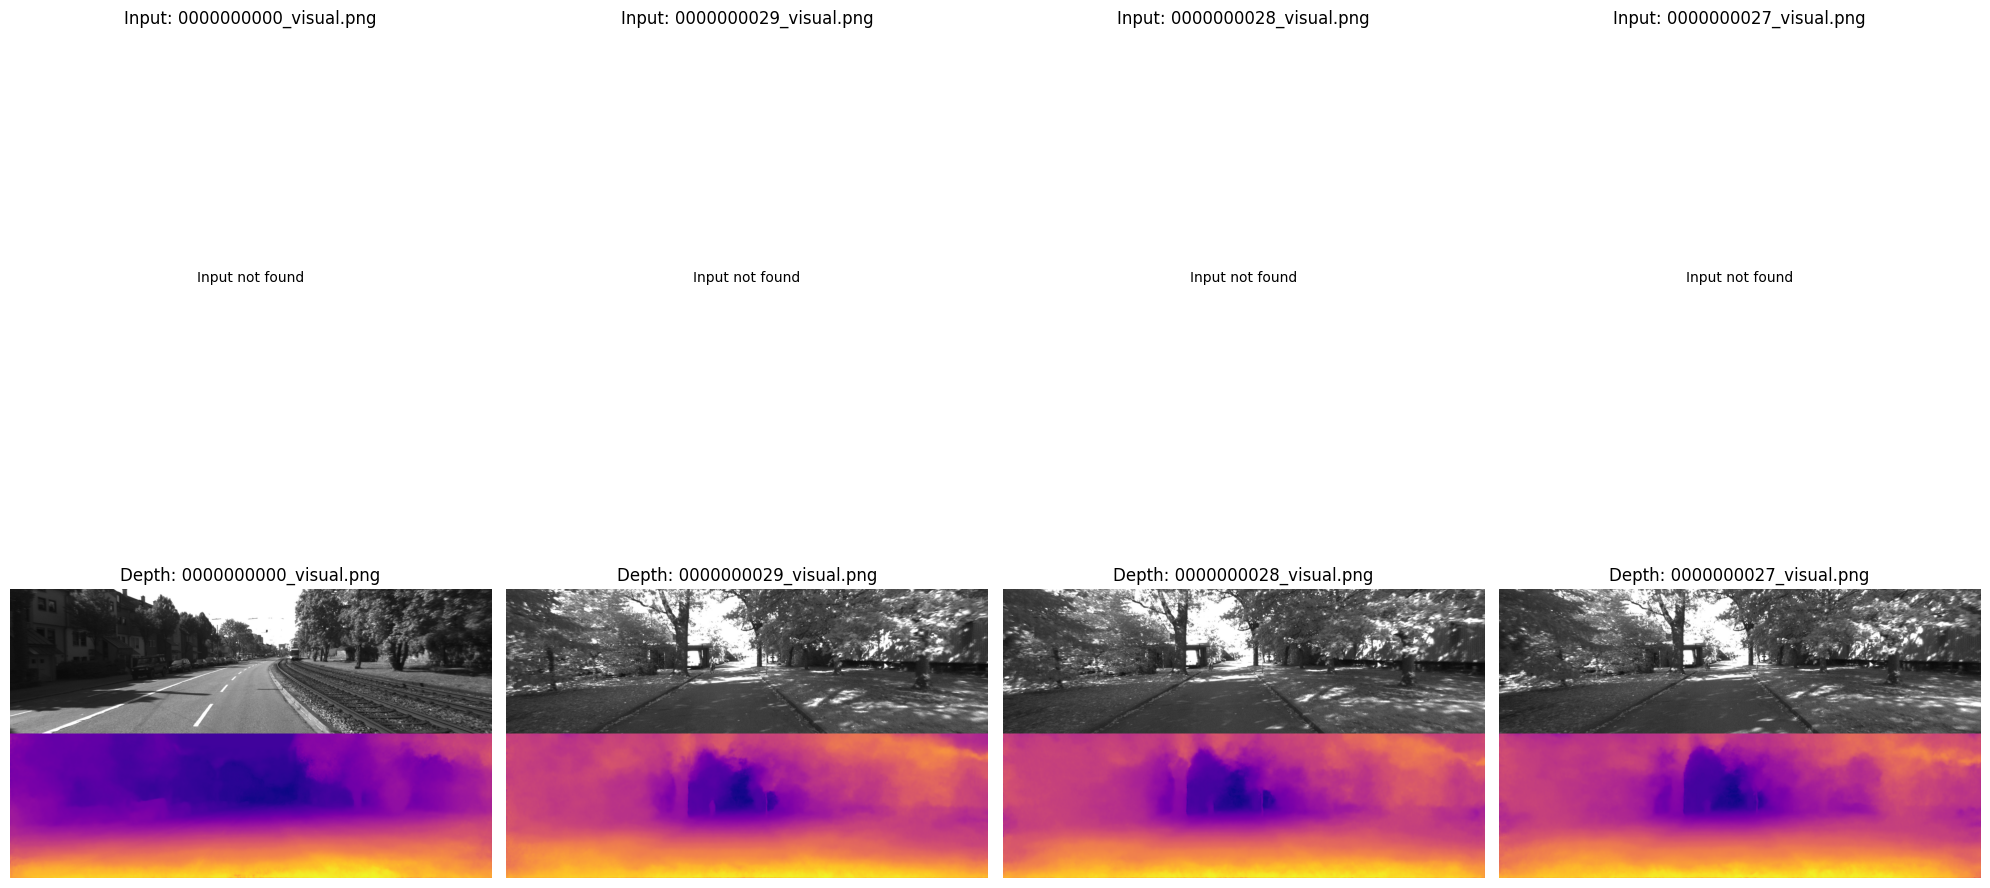


📊 Depth statistics for Timisoara3_pred.npy:
Shape: (384, 1280)
Min: 6.353
Max: 198.871
Mean: 29.064
✅ Visualization complete!


In [32]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

output_dir = "/content/depth_predictions"
input_dir = "example_images"

print("📊 Visualizing depth estimation results...")

if os.path.exists(output_dir) and os.listdir(output_dir):
    # Get output files
    png_files = [f for f in os.listdir(output_dir) if f.endswith('.png')]
    npy_files = [f for f in os.listdir(output_dir) if f.endswith('.npy')]

    print(f"🖼️ Found {len(png_files)} PNG files and {len(npy_files)} NPY files")

    # Show up to 4 results
    num_show = min(len(png_files), 4)
    if num_show > 0:
        fig, axes = plt.subplots(2, num_show, figsize=(5*num_show, 10))
        if num_show == 1:
            axes = axes.reshape(2, 1)

        for i, png_file in enumerate(png_files[:num_show]):
            # Find corresponding input image
            base_name = png_file.replace('_depth.png', '').replace('_pred.png', '')

            # Try to find input image
            input_file = None
            for ext in ['.png']:
                if os.path.exists(f"{input_dir}/{base_name}{ext}"):
                    input_file = f"{base_name}{ext}"
                    break

            # Show input image
            if input_file:
                img = Image.open(f"{input_dir}/{input_file}")
                axes[0, i].imshow(img)
                axes[0, i].set_title(f'Input: {input_file}')
            else:
                axes[0, i].text(0.5, 0.5, 'Input not found', ha='center', va='center')
                axes[0, i].set_title(f'Input: {base_name}')
            axes[0, i].axis('off')

            # Show depth result
            depth_img = Image.open(f"{output_dir}/{png_file}")
            axes[1, i].imshow(depth_img)
            axes[1, i].set_title(f'Depth: {png_file}')
            axes[1, i].axis('off')

        plt.tight_layout()
        plt.show()

    # Show statistics for first NPY file
    if npy_files:
        npy_file = npy_files[0]
        depth_data = np.load(f"{output_dir}/{npy_file}")
        print(f"\n📊 Depth statistics for {npy_file}:")
        print(f"Shape: {depth_data.shape}")
        print(f"Min: {depth_data.min():.3f}")
        print(f"Max: {depth_data.max():.3f}")
        print(f"Mean: {depth_data.mean():.3f}")


else:
    print("❌ No results found to visualize")
    print(f"Checking: {output_dir}")

print("✅ Visualization complete!")


In [ ]:
import zipfile
from google.colab import files

output_dir = "/content/depth_predictions"
zip_name = "tiodepth_results.zip"

print("📦 Creating download package...")

if os.path.exists(output_dir) and os.listdir(output_dir):
    # Create zip file
    with zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for file in os.listdir(output_dir):
            file_path = f"{output_dir}/{file}"
            zipf.write(file_path, file)
            print(f"📄 Added: {file}")

    # Get zip size
    zip_size = os.path.getsize(zip_name) / (1024*1024)
    print(f"\n✅ Created: {zip_name} ({zip_size:.2f} MB)")

    # List contents
    with zipfile.ZipFile(zip_name, 'r') as zipf:
        files_in_zip = zipf.namelist()
        print(f"📋 Contents ({len(files_in_zip)} files):")
        for f in files_in_zip:
            print(f"  - {f}")

    # Download
    print(f"\n📥 Downloading {zip_name}...")
    files.download(zip_name)

    # Cleanup
    os.remove(zip_name)
    print("✅ Download complete!")

else:
    print("❌ No results to download")
    print(f"Check: {output_dir}")

print("\n🎉 All done!")
print("="*60)
print("✅ TiO-Depth prediction completed successfully!")
print("✅ Results visualized and downloaded")
print("✅ Both PNG images and NPY data files included")
print("✅ Ready for further analysis or use!")
print("="*60)


📦 Creating download package...
📄 Added: sample2_pred.npy
📄 Added: 0000000000_visual.png
📄 Added: 0000000029_visual.png
📄 Added: 0000000000_pred.npy
📄 Added: 0000000028_visual.png
📄 Added: 0000000027_visual.png
📄 Added: 0000000029_pred.npy
📄 Added: sample2_visual.png
📄 Added: sample1_pred.npy
📄 Added: 0000000028_pred.npy
📄 Added: 0000000027_pred.npy
📄 Added: sample1_visual.png
📄 Added: 0000000001_visual.png
📄 Added: 0000000001_pred.npy

✅ Created: tiodepth_results.zip (16.78 MB)
📋 Contents (14 files):
  - sample2_pred.npy
  - 0000000000_visual.png
  - 0000000029_visual.png
  - 0000000000_pred.npy
  - 0000000028_visual.png
  - 0000000027_visual.png
  - 0000000029_pred.npy
  - sample2_visual.png
  - sample1_pred.npy
  - 0000000028_pred.npy
  - 0000000027_pred.npy
  - sample1_visual.png
  - 0000000001_visual.png
  - 0000000001_pred.npy

📥 Downloading tiodepth_results.zip...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Download complete!

🎉 All done!
✅ TiO-Depth prediction completed successfully!
✅ Results visualized and downloaded
✅ Both PNG images and NPY data files included
✅ Ready for further analysis or use!


In [ ]:
!python /content/Licenta---Estimarea-adancimii-din-imagini/predict.py --image_path /content/Licenta---Estimarea-adancimii-din-imagini/example_images --exp_opts /content/Licenta---Estimarea-adancimii-din-imagini/options/TiO-Depth/eval/tio_depth-swint-m_384_kitti.yaml --model_path /content/Licenta---Estimarea-adancimii-din-imagini/train_log/2025-06-16_12h32m02s_TiO-Depth-MFM0-ACVDAV21/model/best_model-refdepth.pth --out_dir /content/depth_predictions

/usr/local/lib/python3.11/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
->Load the pretrained model
->pretrained path: /content/Licenta---Estimarea-adancimii-din-imagini/train_log/2025-06-16_12h32m02s_TiO-Depth-MFM0-ACVDAV21/model/best_model-refdepth.pth
/usr/local/lib/python3.11/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
path_my.py is not existing
/usr/local/lib/python3.11/dist-packages/torchvision/mod